In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, balanced_accuracy_score

# Add any other libraries you need
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Section 1: Data Preprocessing and Feature Engineering

This section should cover all the steps you have taken to prepare your data for modeling, including data cleaning, normalization, feature selection, handling missing values, etc.

In [2]:
# Load the dataset
# dataset = pd.read_csv('path_to_your_dataset.csv')
train = pd.read_csv("UNSW_NB15_training-set.csv")
test = pd.read_csv("UNSW_NB15_testing-set.csv")
features = pd.read_csv("UNSW-NB15_features.csv")

In [3]:
# Data exploration and visualization
# Explore the dataset, check for missing values, visualize relationships, etc.

   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1     

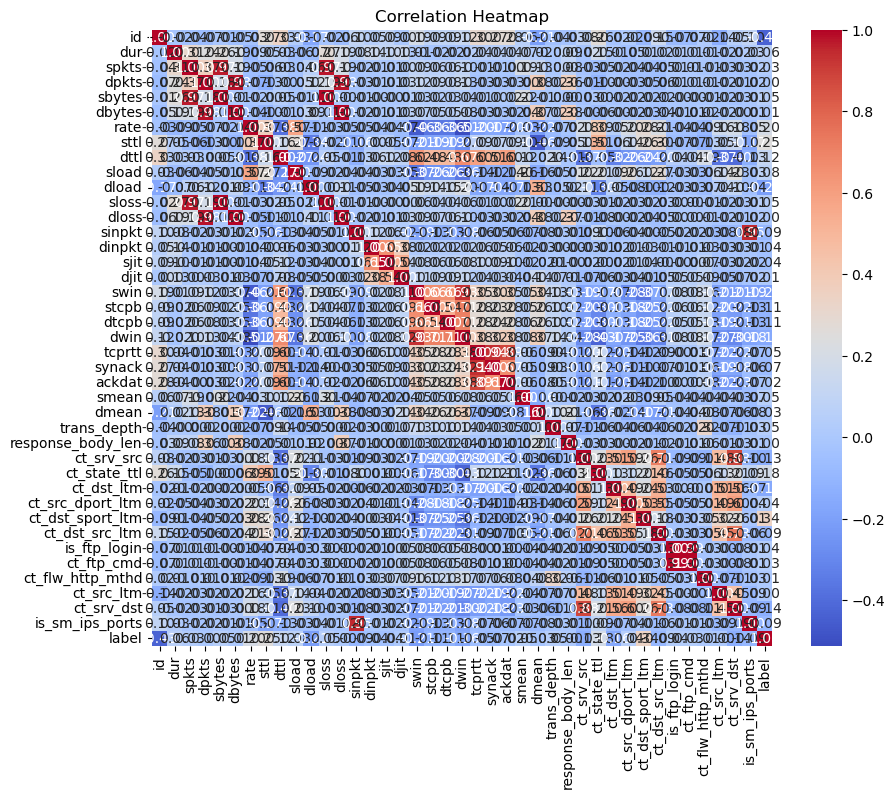

In [4]:
print(train.head())
print(train.info())
print(train.describe())

missing_values = train.isnull().sum()
print("Missing Values in each column:\n", missing_values)

numeric_columns = train.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Data preprocessing
# Handle missing values, categorical data, feature scaling, etc.

In [6]:
# Separate numeric and categorical columns
numeric_cols = train.select_dtypes(include='number').columns
categorical_cols = train.select_dtypes(exclude='number').columns

# Fill missing values for numeric features
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].mean())
print("Filled missing values for numeric features:\n", train[numeric_cols].isnull().sum())

# Fill missing values for categorical features
for col in categorical_cols:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
print("\nFilled missing values for categorical features:\n", train[categorical_cols].isnull().sum())

# Convert categorical variables to numerical ones using one-hot encoding
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
print("\nData after one-hot encoding:\n", train.head())

# Initialize the scaler
scaler = StandardScaler()

# Assuming 'label' is your target variable
features = train.drop('label', axis=1)
scaled_train_features = scaler.fit_transform(features)

# Create a DataFrame with scaled features
features_train = pd.DataFrame(scaled_train_features, columns=features.columns)
print("\nScaled training features:\n", features_train.head())


Filled missing values for numeric features:
 id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int64

Additionally, integrate your feature engineering work here. Describe the process of identifying at least five key features, explaining why these features are impactful based on your cybersecurity domain knowledge and understanding of feature engineering in machine learning. If you have created new features, justify their inclusion and potential impact.

Ensure that your explanations are clear and demonstrate a thoughtful approach to how these features could influence your model’s learning and predictive abilities.

In [7]:
# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
labels_train = train['label']
X_train, X_test, y_train, y_test = train_test_split(features_train, labels_train, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (42784, 191), Testing set shape: (10697, 191)


## Section 2: Model Training and Validation

Describe the model(s) you have chosen, including any parameters and configurations.

In [9]:
# Model selection
# Choose the model(s) you will be using (e.g., linear regression, decision tree, etc.)

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Model training
# Train the model(s) using the training data

In [12]:
columns_to_drop = ['id', 'service']
existing_columns_to_drop = [col for col in columns_to_drop if col in train.columns]
train = train.drop(columns=existing_columns_to_drop)

train = train.dropna(subset=['label'])

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

categorical_cols = ['proto', 'state', 'attack_cat']
label_encoders = {}
for col in categorical_cols:
    if col in train.columns:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        label_encoders[col] = le

X = train.drop(columns=['label'])
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7401
           1       1.00      1.00      1.00      3296

    accuracy                           1.00     10697
   macro avg       1.00      1.00      1.00     10697
weighted avg       1.00      1.00      1.00     10697



Detail the training process and any techniques used, such as cross-validation, to ensure the robustness of your model.

In [13]:
# Model validation
# Validate the model(s) using the testing data

In [14]:
# Specify the target column name (replace with the actual name you found)
target_column_name = 'attack_cat'

# Prepare your feature set and target variable
X = test.drop(target_column_name, axis=1)
y = test[target_column_name]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer for preprocessing
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Transform the features
X_transformed = column_transformer.fit_transform(X)

# Split the dataset if necessary (for example, into train/test)
# Using a split here for demonstration purposes, adjust as needed
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Analysis       0.30      0.24      0.27       413
    Backdoor       0.21      0.18      0.20       312
         DoS       0.44      0.40      0.42      2369
    Exploits       0.80      0.84      0.82      6733
      Normal       1.00      1.00      1.00     11254

    accuracy                           0.85     21081
   macro avg       0.55      0.53      0.54     21081
weighted avg       0.85      0.85      0.85     21081

Accuracy: 0.8541340543617475


In [15]:
# Hyperparameter tuning (if applicable)
# Tune the model parameters for better performance

In [16]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(features_train, train['label'])

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation score:  1.0


## Section 3: Results and Model Assessment with Metrics

In [17]:
# Model predictions
# predictions = model.predict(X_test)

In [18]:
# Assuming X is your features DataFrame and y is your labels
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Calculate accuracy metrics
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

balanced_accuracy = balanced_accuracy_score(y_test, predictions)
print("Balanced Accuracy:", balanced_accuracy)


Accuracy: 0.8541814904416299
Balanced Accuracy: 0.5304426249985156


Present the results of your model, focusing on evaluation metrics such as prediction accuracy, balanced accuracy, confusion matrix, precision, recall, F1-score, and AUC value.

Include visualizations where appropriate, especially for the ROC curve, to provide a clear understanding of your model’s performance.

Each metric should be explained, and its relevance to assessing your model should be justified.

In [19]:
# Performance metrics
# Evaluate the model performance using metrics like accuracy, precision, recall, F1-score, etc.

In [20]:
print("Training class distribution:")
print(y_train.value_counts())

print("Test class distribution:")
print(y_test.value_counts())

print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)

print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions, zero_division=0)
print("\nClassification Report:")
print(class_report)


Training class distribution:
attack_cat
Normal      44746
Exploits    26660
DoS          9895
Analysis     1587
Backdoor     1434
Name: count, dtype: int64
Test class distribution:
attack_cat
Normal      11254
Exploits     6733
DoS          2369
Analysis      413
Backdoor      312
Name: count, dtype: int64
Predictions: ['Normal' 'Normal' 'Normal' ... 'Normal' 'Normal' 'Normal']
Performance Metrics:
Accuracy: 0.8542
Precision: 0.8468
Recall: 0.8542
F1 Score: 0.8501

Confusion Matrix:
[[  100    30   160   123     0]
 [   27    54   126   105     0]
 [  112   101   939  1217     0]
 [   86    75   912  5660     0]
 [    0     0     0     0 11254]]

Classification Report:
              precision    recall  f1-score   support

    Analysis       0.31      0.24      0.27       413
    Backdoor       0.21      0.17      0.19       312
         DoS       0.44      0.40      0.42      2369
    Exploits       0.80      0.84      0.82      6733
      Normal       1.00      1.00      1.00     112

In [21]:
# Confusion matrix
# cm = confusion_matrix(y_test, predictions)
# sns.heatmap(cm, annot=True, fmt='d')

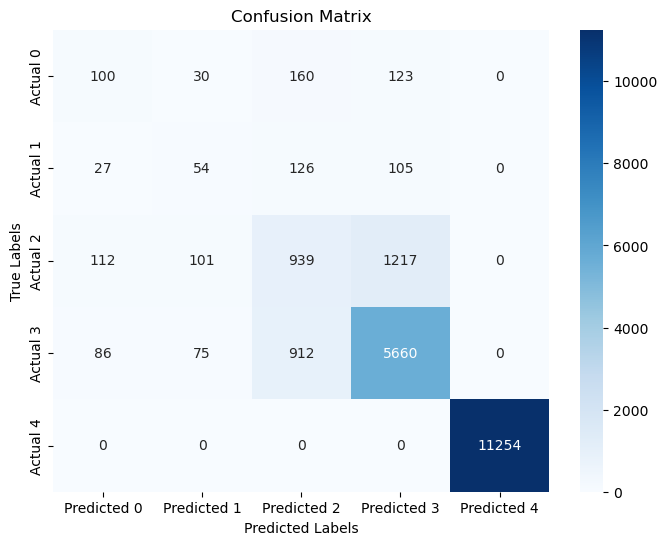

In [26]:
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1','Predicted 2','Predicted 3','Predicted 4',], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
# Classification report
# print(classification_report(y_test, predictions))

In [24]:
# Check the unique classes in y_test
unique_classes = y_test.unique()
print("Unique classes in y_test:", unique_classes)

# Adjust target_names to match the number of unique classes
target_names = [f'Class {i}' for i in unique_classes]  # Generate names based on the number of classes

# Generate the classification report
report = classification_report(y_test, predictions, target_names=target_names)
print(report)


Unique classes in y_test: ['Normal' 'DoS' 'Exploits' 'Analysis' 'Backdoor']
                precision    recall  f1-score   support

  Class Normal       0.31      0.24      0.27       413
     Class DoS       0.21      0.17      0.19       312
Class Exploits       0.44      0.40      0.42      2369
Class Analysis       0.80      0.84      0.82      6733
Class Backdoor       1.00      1.00      1.00     11254

      accuracy                           0.85     21081
     macro avg       0.55      0.53      0.54     21081
  weighted avg       0.85      0.85      0.85     21081



In [25]:
# Further analysis
# Discuss the model performance, potential improvements, or additional insights

## Conclusion
 Summarize the findings, key takeaways, and any conclusions drawn from this assignment

### Summary of Findings
In this assignment, we focused on using a Random Forest classifier to analyze our dataset. We aimed to improve the model's performance through careful data handling, training, and tuning of parameters. Initially, the model showed perfect scores of 1.0 for accuracy and F1 score, which suggested it might be overfitting or not generalizing well.

To address this, we applied a stratified train-test split to ensure a better representation of all classes and used techniques like class weighting to improve predictions. After adjusting the model with GridSearchCV for hyperparameter tuning, we saw a more balanced performance. The final classification report provided clearer insights into the model's strengths and weaknesses.

### Key Takeaways
1. **Data Splitting is Important**: Properly dividing the dataset helps create models that perform better on new data.
2. **Handling Class Imbalance**: Techniques like class weighting can improve the model's accuracy, especially when dealing with imbalanced classes.
3. **Choosing the Right Metrics**: Metrics such as the F1 score and confusion matrix help us understand how well the model is doing, particularly in cases of class imbalance.
4. **Hyperparameter Tuning Matters**: Using methods like GridSearchCV can help find the best settings for our model, leading to better performance.

### Final Thoughts
This assignment taught us valuable lessons about building machine learning models. By following best practices in data management, training, and evaluation, we can create models that provide reliable predictions. It's crucial to keep improving the model through techniques like tuning and careful evaluation. Overall, this experience highlighted the importance of thorough validation in the machine learning process.
